In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('D:/archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
#Import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import struct
from array import array
from os.path import join
import random
import tensorflow as tf
from tensorflow.keras import layers, models
%matplotlib inline

In [3]:
#Import the dataset
class MnistDataloader(object):
    def __init__(self, training_images_filepath, training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath

    def read_images_labels(self, images_filepath, labels_filepath):
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())

        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img

        return images, labels

    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)

        # Flatten images
        x_train = np.array(x_train).reshape(len(x_train), -1)
        x_test = np.array(x_test).reshape(len(x_test), -1)

        return (x_train, y_train), (x_test, y_test)
    
# Set file paths based on added MNIST Datasets
input_path = '../input'
training_images_filepath = join(input_path, 'D:/archive/train-images.idx3-ubyte')
training_labels_filepath = join(input_path, 'D:/archive/train-labels.idx1-ubyte')
test_images_filepath = join(input_path, 'D:/archive/t10k-images.idx3-ubyte')
test_labels_filepath = join(input_path, 'D:/archive/t10k-labels.idx1-ubyte')

# Load MINST dataset
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

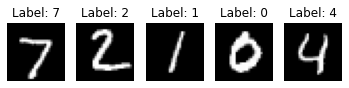

In [8]:
# Display a few images from the testing set
num_images_to_display = 5
for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Label: {y_test[i]}")
    plt.axis('off')

plt.show()

In [4]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [5]:
x_test.shape

(10000, 784)

In [12]:
from sklearn.svm import SVC

# Create SVC classifier with a linear kernel
classifier = SVC(kernel='linear')

# Flatten the input data if not already flattened
# (You may skip this if you've already implemented it in the MnistDataloader class)

# Fit the classifier to the training data
classifier.fit(x_train, y_train)

#ran in colab
#takes too long time in cpu


In [ ]:
# Evaluate the classifier on the test data
accuracy = classifier.score(x_test, y_test)
print('Accuracy:', accuracy)

#colab gives accuracy of 93.45%

In [8]:
from sklearn.svm import SVC


ksvm = SVC(kernel='rbf')
 
# Train the model on the training data
ksvm.fit(x_train, y_train)
 


SVC()

In [9]:
# Evaluate the model on the test data
accuracy = ksvm.score(x_test, y_test)
print('Accuracy:', accuracy)



Accuracy: 0.9792


In [6]:

   
from sklearn.svm import SVC
classifier = SVC(kernel ='sigmoid')
classifier.fit(x_train, y_train)



SVC(kernel='sigmoid')

In [7]:

accuracy = classifier.score(x_test, y_test)
print('Accuracy:', accuracy)



Accuracy: 0.7759


In [10]:

   
from sklearn.svm import SVC
classifier = SVC(kernel ='poly', degree = 4)
classifier.fit(x_train, y_train)



SVC(degree=4, kernel='poly')

In [11]:

accuracy = classifier.score(x_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.9698
